In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import re
from io import StringIO

%matplotlib inline

# Data Input
### Explanation:
read the content of .data file into the program and store the data as dataframe(variable:data)

In [35]:
#extract data from .data file into DataFrame
title_name = ['sepal length in cm','sepal width in cm',
            'petal length in cm','petal width in cm','Label']
data = np.asanyarray(pd.read_csv(r'iris_data/iris.data', header=None))
data = pd.DataFrame(data, columns=title_name)

data_Se=data[data.Label=='Iris-setosa']
data_Ve=data[data.Label=='Iris-versicolor']
data_Vi=data[data.Label=='Iris-virginica']
Label = pd.DataFrame(data['Label'], columns=['Label'])
feature = data.drop(columns=['Label'])


# Data Visualization
## Average and Standard Deviation
### Overall Feature
show the overall average & standard deviation of all features

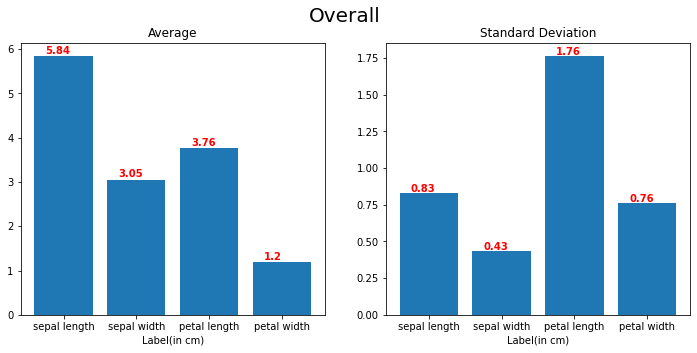

In [36]:
import scipy.stats as stats
import math
average = []
variance = feature.var()
for f in feature.columns:
    average.append(feature[f].mean())

#average ,standard deviation
x = np.arange(4)
fig_1, ax = plt.subplots(1,2,sharex=True)
fig_1.suptitle("Overall",fontsize=20)
plt.xticks(ticks=range(0,4),labels=['sepal length','sepal width','petal length','petal width'])
ax[0].bar(x,average)
ax[0].set_title("Average")
ax[0].set_xlabel("Label(in cm)")
ax[1].bar(x,pow(variance.values,0.5))
ax[1].set_title("Standard Deviation")
ax[1].set_xlabel("Label(in cm)")
for i, v in enumerate(average):
    ax[0].text(i-0.25, v+0.05, str(round(v,2)), color='red', fontweight='bold')
for i, v in enumerate(pow(variance.values,0.5)):
    ax[1].text(i-0.25, v+0.01, str(round(v,2)), color='red', fontweight='bold')

fig_1.set_figheight(5)
fig_1.set_figwidth(12)
plt.show()

### Iris Setosa Feature
show the average & standard deviation of features with label as Iris Setosa

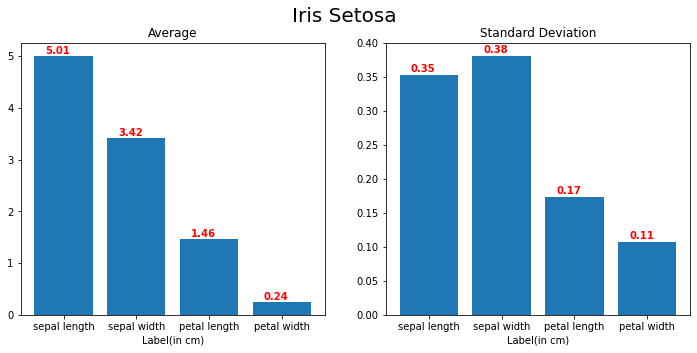

In [37]:
average = []
variance = data_Se.drop(columns=['Label']).var()
for f in data_Se.drop(columns=['Label']).columns:
    average.append(data_Se.drop(columns=['Label'])[f].mean())

#average ,standard deviation
x = np.arange(4)
fig_2, ax = plt.subplots(1,2,sharex=True)
fig_2.suptitle("Iris Setosa",fontsize=20)
plt.xticks(ticks=range(0,4),labels=['sepal length','sepal width','petal length','petal width'])
ax[0].bar(x,average)
ax[0].set_title("Average")
ax[0].set_xlabel("Label(in cm)")
ax[1].bar(x,pow(variance.values,0.5))
ax[1].set_title("Standard Deviation")
ax[1].set_xlabel("Label(in cm)")
for i, v in enumerate(average):
    ax[0].text(i-0.25, v+0.05, str(round(v,2)), color='red', fontweight='bold')
for i, v in enumerate(pow(variance.values,0.5)):
    ax[1].text(i-0.25, v+0.005, str(round(v,2)), color='red', fontweight='bold')


fig_2.set_figheight(5)
fig_2.set_figwidth(12)
plt.show()

### Iris Versicolour Feature
show the average & standard deviation of features with label as Iris Versicolour

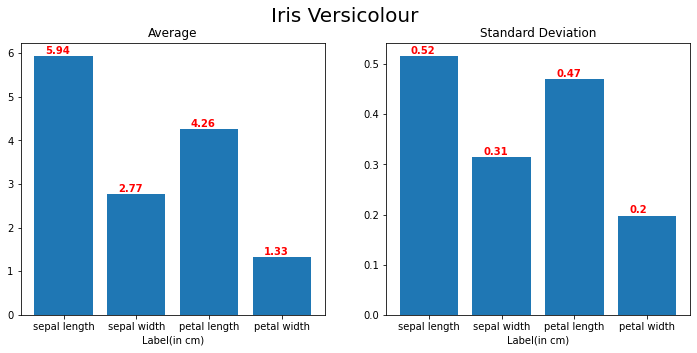

In [38]:
average = []
variance = data_Ve.drop(columns=['Label']).var()
for f in data_Ve.drop(columns=['Label']).columns:
    average.append(data_Ve.drop(columns=['Label'])[f].mean())
#average ,standard deviation
x = np.arange(4)
fig_3, ax = plt.subplots(1,2,sharex=True)
fig_3.suptitle("Iris Versicolour",fontsize=20)
plt.xticks(ticks=range(0,4),labels=['sepal length','sepal width','petal length','petal width'])
ax[0].bar(x,average)
ax[0].set_title("Average")
ax[0].set_xlabel("Label(in cm)")
ax[1].bar(x,pow(variance.values,0.5))
ax[1].set_title("Standard Deviation")
ax[1].set_xlabel("Label(in cm)")
for i, v in enumerate(average):
    ax[0].text(i-0.25, v+0.05, str(round(v,2)), color='red', fontweight='bold')
for i, v in enumerate(pow(variance.values,0.5)):
    ax[1].text(i-0.25, v+0.005, str(round(v,2)), color='red', fontweight='bold')


fig_3.set_figheight(5)
fig_3.set_figwidth(12)
plt.show()

### Iris Virginica Feature
show the average & standard deviation of features with label as Iris Virginica

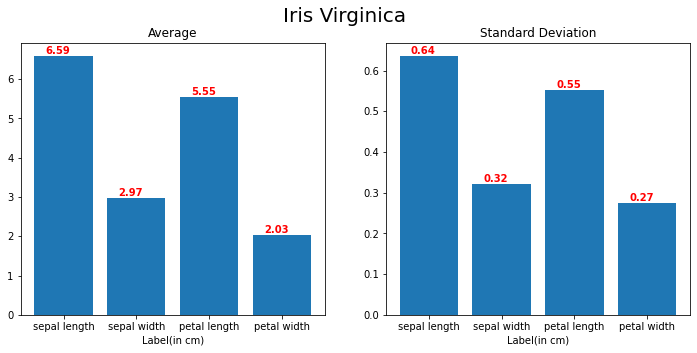

In [39]:
average = []
variance = data_Vi.drop(columns=['Label']).var()
for f in data_Vi.drop(columns=['Label']).columns:
    average.append(data_Vi.drop(columns=['Label'])[f].mean())
#average ,standard deviation
x = np.arange(4)
fig_4, ax = plt.subplots(1,2,sharex=True)
fig_4.suptitle("Iris Virginica",fontsize=20)
plt.xticks(ticks=range(0,4),labels=['sepal length','sepal width','petal length','petal width'])
ax[0].bar(x,average)
ax[0].set_title("Average")
ax[0].set_xlabel("Label(in cm)")
ax[1].bar(x,pow(variance.values,0.5))
ax[1].set_title("Standard Deviation")
ax[1].set_xlabel("Label(in cm)")
for i, v in enumerate(average):
    ax[0].text(i-0.25, v+0.05, str(round(v,2)), color='red', fontweight='bold')
for i, v in enumerate(pow(variance.values,0.5)):
    ax[1].text(i-0.25, v+0.005, str(round(v,2)), color='red', fontweight='bold')


fig_4.set_figheight(5)
fig_4.set_figwidth(12)
plt.show()

## Feature visualization
create 4 figures to show the values distribution of every feature in 

Overall, Label = Iris Setosa, Label = Iris Versicolor, Label = Iris Virginica

4 situations(bins = auto)

<Figure size 720x720 with 0 Axes>

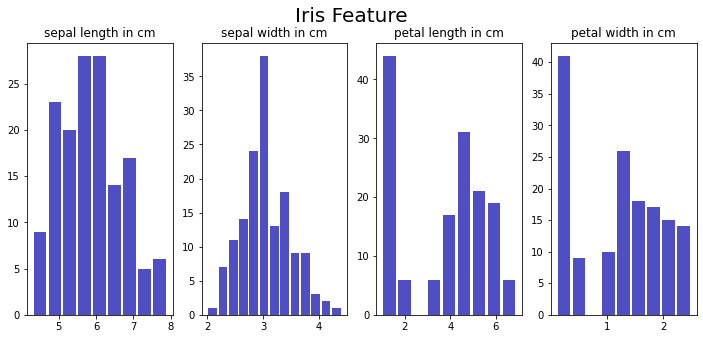

<Figure size 720x720 with 0 Axes>

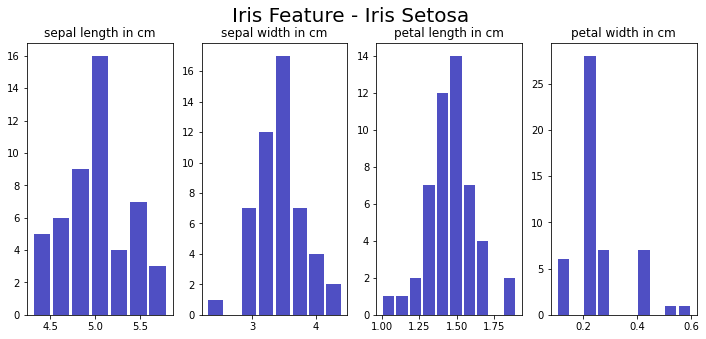

<Figure size 720x720 with 0 Axes>

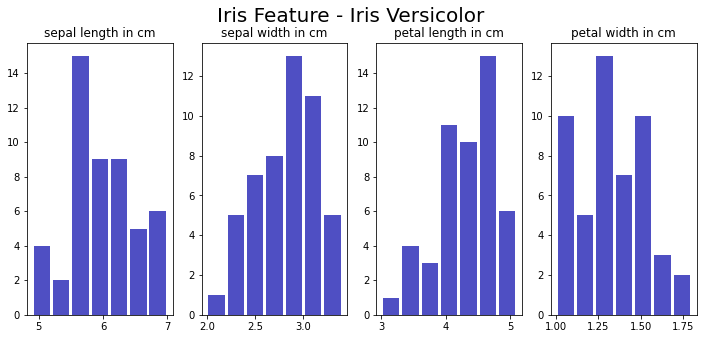

<Figure size 720x720 with 0 Axes>

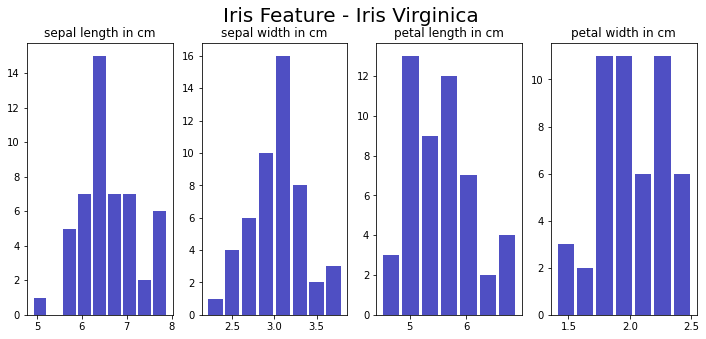

In [40]:
#draw overall feature
plt.figure(figsize=[10,10])
fig_a,a = plt.subplots(1,4)
fig_a.suptitle("Iris Feature",fontsize=20)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(feature.iloc[:,idx], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(feature.columns[idx])

#draw "Iris-setosa" feature
plt.figure(figsize=[10,10])
fig_Se,a = plt.subplots(1,4)
fig_Se.suptitle("Iris Feature - Iris Setosa",fontsize=20)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data_Se.drop(columns=['Label']).iloc[:,idx], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(data_Se.drop(columns=['Label']).columns[idx])

#draw "Iris-versicolor" feature
plt.figure(figsize=[10,10])
fig_Ve,a = plt.subplots(1,4)
fig_Ve.suptitle("Iris Feature - Iris Versicolor",fontsize=20)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data_Ve.drop(columns=['Label']).iloc[:,idx], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(data_Ve.drop(columns=['Label']).columns[idx])

#draw "Iris-virginica" feature
plt.figure(figsize=[10,10])
fig_Vi,a = plt.subplots(1,4)
fig_Vi.suptitle("Iris Feature - Iris Virginica",fontsize=20)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data_Vi.drop(columns=['Label']).iloc[:,idx], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(data_Vi.drop(columns=['Label']).columns[idx])

#print(feature[feature.columns[0]].values.min())

fig_a.set_figwidth(12)
fig_a.set_figheight(5)
fig_Se.set_figwidth(12)
fig_Se.set_figheight(5)
fig_Ve.set_figwidth(12)
fig_Ve.set_figheight(5)
fig_Vi.set_figwidth(12)
fig_Vi.set_figheight(5)
plt.show()

# Train-Test-Split
## Holdout validation
### Explanation:
Shuffle data, then split the data into test_feature, train_feature, test_Label, train_Label(7:3)

fit the training data into the Naive Bayes model with 1D-Normal(Gaussian) distribution, and compare the predicted result and the ground truth to get 

Accuracy, Precision, Sensitivity, and Confusion matrix

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Holdout 7:3 and shuffle
test_feature, train_feature, test_Label, train_Label = train_test_split(
    feature,Label,test_size=0.7, shuffle=True)

clt = GaussianNB()
clt.fit(train_feature,train_Label.values.ravel())
Hpredict = clt.predict(test_feature)
clt.score(train_feature, train_Label)

print("Holdout:")
print("Accuracy:",clt.score(test_feature, test_Label))
print("Precision:",precision_score(test_Label.values.flatten(),Hpredict,average=None))
print("Sensitivity:",np.array(recall_score(test_Label.values.flatten(),Hpredict,average=None)))
print("Confusion_matrix:\n",confusion_matrix(test_Label,Hpredict))

Holdout:
Accuracy: 0.9555555555555556
Precision: [1.         0.84615385 1.        ]
Sensitivity: [1.         1.         0.88888889]
Confusion_matrix:
 [[16  0  0]
 [ 0 11  0]
 [ 0  2 16]]


## K-fold cross validation
### Explanation:
Shuffle the data, introduce KFold function in the code and split the data into 3 fold

fit the training data of every fold into the Naive Bayes model with 1D-Normal(Gaussian) distribution, and compare the predicted result and the ground truth to get the value of Accuracy, Precision, Sensitivity, and Confusion matrix of every fold

then get the mean of them to get the overall Accuracy, Precision, Sensitivity, and Confusion matrix

In [42]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)
kf.get_n_splits(feature)

#without Laplace
NConfusion = np.zeros((3,3))
NAccurancy_sum = 0
NPrecision_sum = 0
NRecall_sum = 0
for train_index, test_index in kf.split(feature):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = feature.values[train_index], feature.values[test_index]
    y_train, y_test = Label.values[train_index], Label.values[test_index]
    clt = GaussianNB()
    clt.fit(X_train,y_train.ravel())
    Kpredict = clt.predict(X_test)
    NAccurancy_sum += clt.score(X_test, y_test)
    NPrecision_sum += precision_score(y_test.flatten(),Kpredict,average=None)
    NRecall_sum += recall_score(y_test.flatten(),Kpredict,average=None)
    Kpredict = clt.predict(X_test)
    NConfusion += confusion_matrix(y_test,Kpredict)

print("K-fold:")
print("Accuracy:",NAccurancy_sum/3.0)
print("Precision:",NPrecision_sum/3.0)
print("Sensitivity:",NRecall_sum/3.0)
print("Confusion_matrix:\n",(NConfusion/3).astype(int))

K-fold:
Accuracy: 0.96
Precision: [1.         0.94444444 0.94212963]
Sensitivity: [1.         0.93981481 0.94212963]
Confusion_matrix:
 [[16  0  0]
 [ 0 15  1]
 [ 0  1 15]]


# Comparison & Conclusion
In this case, the two validation doesn't really show much difference, with many testing, sometimes H-holdout performs better, sometimes K-fold does.
However, the percentage of accurancy, precision, recall have drop under 80% once, which can show that the model trained in the case is very decent, can precisely predict the class of the Iris.

# Question
1.What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)?

2.Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)

In [43]:
#Question 1
target = data[data.Label=='Iris-versicolor']['petal length in cm']

print("mean:",target.values.mean())
print("sigma:",target.std())

mean: 4.26
sigma: 0.46991097723995795


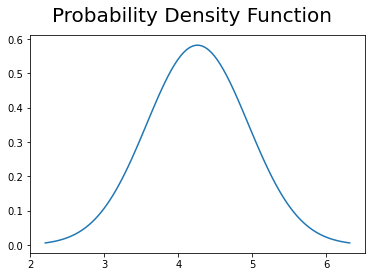

In [44]:
#Question 2
import scipy.stats as stats

mu = target.values.mean()
variance = target.std()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.suptitle("Probability Density Function",fontsize=20)
plt.show()